# ***Geek-O-Lympics***
![image](https://www.canr.msu.edu/contentAsset/image/3a2f8e97-7517-4da3-9d21-a17b375ecf51/fileAsset/filter/Resize,Jpeg/resize_w/750/jpeg_q/80)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Reading the CSV file**

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# **Checking for the null and duplicate values**

In [ ]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
df.duplicated().sum()

1385

# **Removing the rows with null values and duplicates**

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [ ]:
df.shape

(30181, 15)

In [ ]:
df = df[df['Season'] == 'Summer']

In [ ]:
df.shape

(25341, 15)

In [ ]:
df['Team'].unique()

array(['Finland', 'Netherlands', 'Norway', 'Italy', 'Spain', 'Azerbaijan',
       'Russia', 'Belarus', 'France', 'Cameroon', 'United States',
       'Hungary', 'Australia', 'Iran', 'Canada', 'Pakistan',
       'Soviet Union', 'Uzbekistan', 'Tajikistan', 'Unified Team',
       'Ethiopia', 'East Germany', 'Sweden', 'Turkey', 'Bulgaria',
       'Egypt', 'Great Britain', 'Jordan', 'Japan', 'Romania',
       'Puerto Rico', 'Mexico', 'Ghana', 'Switzerland', 'Morocco',
       'New Zealand', 'Argentina', 'Cuba', 'Poland', 'Czechoslovakia',
       'Germany', 'Nigeria', 'Brazil', 'France-1', 'Lithuania',
       'South Africa', 'Indonesia', 'Indonesia-1', 'Germany-1', 'Mutafo',
       'Chile', 'Ukraine', 'Greece', 'Uganda', 'Syria', 'Qatar', 'Kuwait',
       'Individual Olympic Athletes', 'Saudi Arabia',
       'United Arab Emirates', 'Croatia', 'West Germany', 'Armenia',
       'Serbia', 'Niger', 'India', 'Brazil-1', 'Algeria', 'Austria',
       'Trinidad and Tobago', 'Colombia', 'East Germany-1

In [ ]:
df.duplicated().sum()

0

In [ ]:

df['Medal'].value_counts()

Bronze    8566
Gold      8542
Silver    8233
Name: Medal, dtype: int64

# **Top 10 participating countries in summer season**

In [ ]:
summer = df[df['Season'] == 'Summer'][['Team','Season']]
Top_summer = summer['Team'].value_counts().sort_values(ascending = False).head(10)
Top_summer

United States    3815
Soviet Union     1864
Germany          1246
Australia        1182
Great Britain     977
Russia            883
Italy             871
France            843
East Germany      841
China             828
Name: Team, dtype: int64

<Axes: title={'center': 'Top 10 participating countries in summer'}, xlabel='Country', ylabel='Team'>

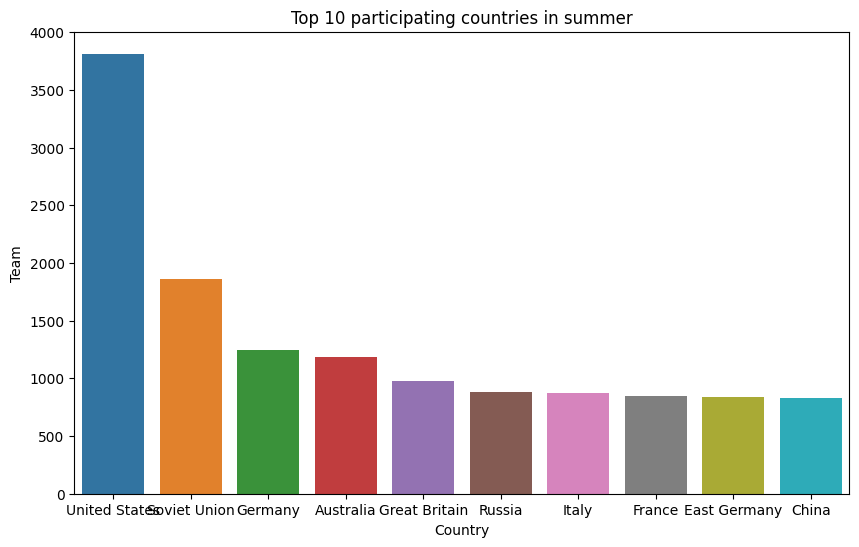

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top 10 participating countries in summer')
plt.xlabel('Country')
plt.ylabel('No. of Participants')
sns.barplot(x = Top_summer.index, y = Top_summer)

# **Distribution of Gender**

<Axes: ylabel='Sex'>

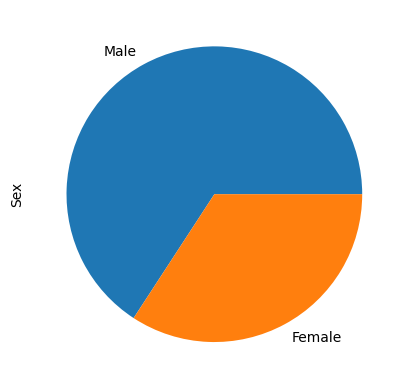

In [ ]:
df['Sex'].value_counts().plot(kind = 'pie', labels = ['Male','Female'])

# **Top 5 countries with most medals**

<Axes: ylabel='Medal'>

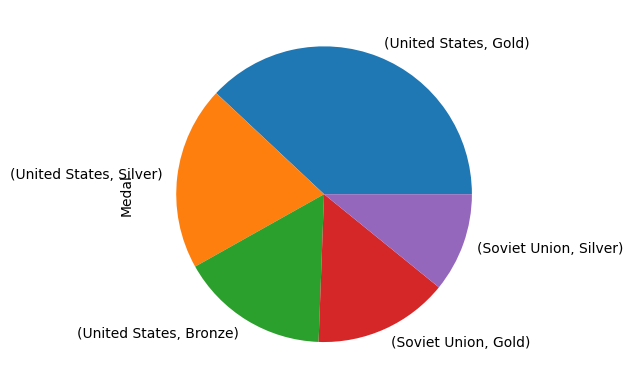

In [ ]:
medals = df.groupby('Team')['Medal'].value_counts()
top_countries = medals.sort_values(ascending = False).head()
top_countries.plot(kind = 'pie')


# **Top 5 players with most medals**

Text(0.5, 1.0, 'Top 5 players with most medals')

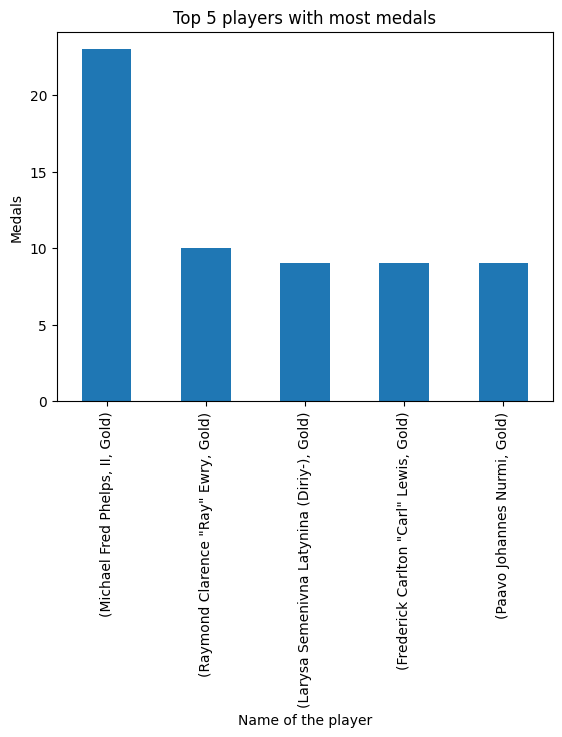

In [ ]:
medal_players = df.groupby('Name')['Medal'].value_counts()
top_players = medal_players.sort_values(ascending = False).head()
top_players.plot(kind = 'bar')
plt.xlabel('Name of the player')
plt.ylabel('Medals')
plt.title('Top 5 players with most medals')

# **Distribution of medals across male & female**

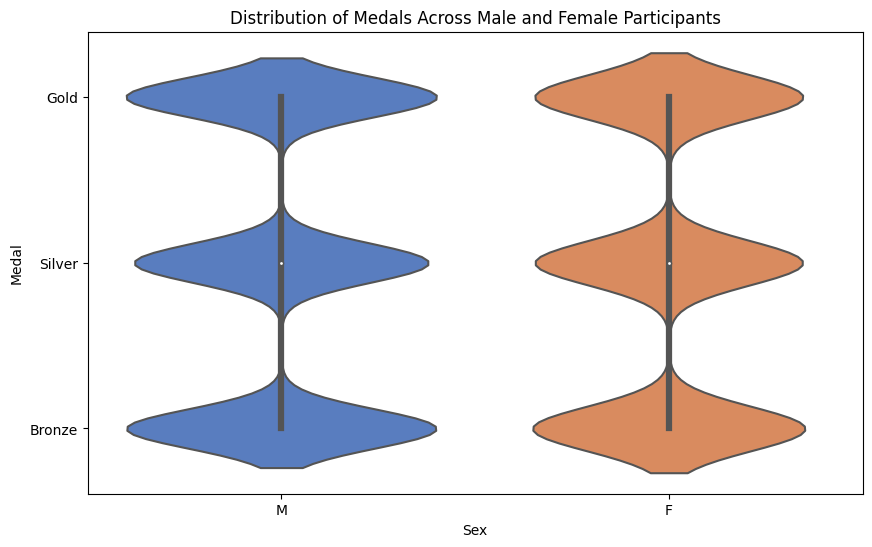

In [ ]:
df_filtered = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
df_filtered['Medal_encoded'] = df_filtered['Medal'].map(medal_mapping)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Medal_encoded', data=df_filtered, palette='muted', order=['M', 'F'])
plt.xlabel('Sex')
plt.ylabel('Medal')
plt.title('Distribution of Medals Across Male and Female Participants')
plt.yticks([1, 2, 3], ['Bronze', 'Silver', 'Gold'])
plt.show()

# **Top 10 Sports which got Bronze**

<Axes: title={'center': 'Top 10 Sports which got Bronze'}, xlabel='Sports', ylabel='Sport'>

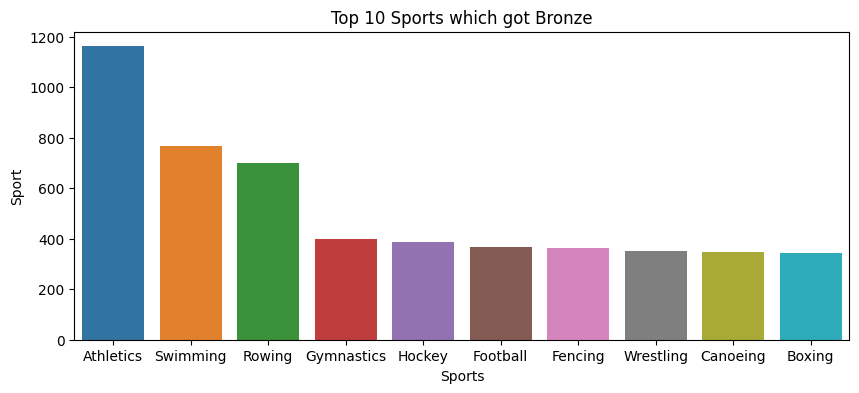

In [ ]:

bronze = df[df['Medal'] == 'Bronze'][['Sport']]
Bronze = bronze['Sport'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,4))
plt.title('Top 10 Sports which got Bronze')
plt.xlabel('Sports')
plt.ylabel('Number of Bronze')
sns.barplot(x = Bronze.index, y = Bronze)

# **Top 10 Sports which got Silver**

<Axes: title={'center': 'Top 10 Sports which got Silver'}, xlabel='Sports', ylabel='Sport'>

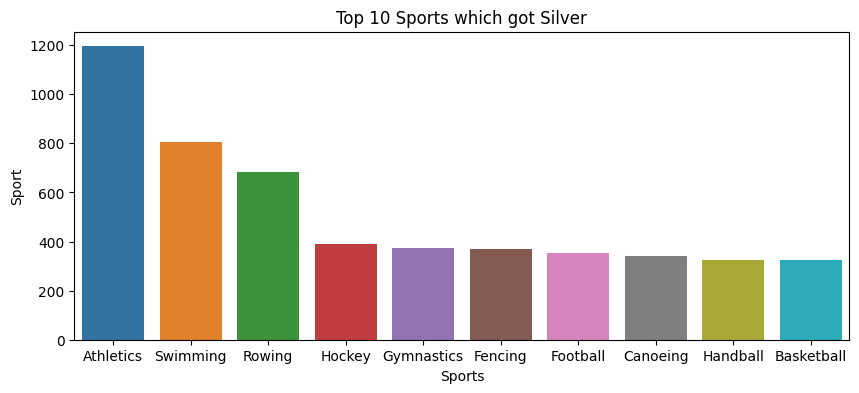

In [ ]:
silver = df[df['Medal'] == 'Silver'][['Sport']]
Silver = silver['Sport'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,4))
plt.title('Top 10 Sports which got Silver')
plt.xlabel('Sports')
plt.ylabel('Number of Silver')
sns.barplot(x = Silver.index, y = Silver)

# **Top 10 Sports which got Gold**

<Axes: title={'center': 'Top 10 Sports which got Gold'}, xlabel='Sports', ylabel='Sport'>

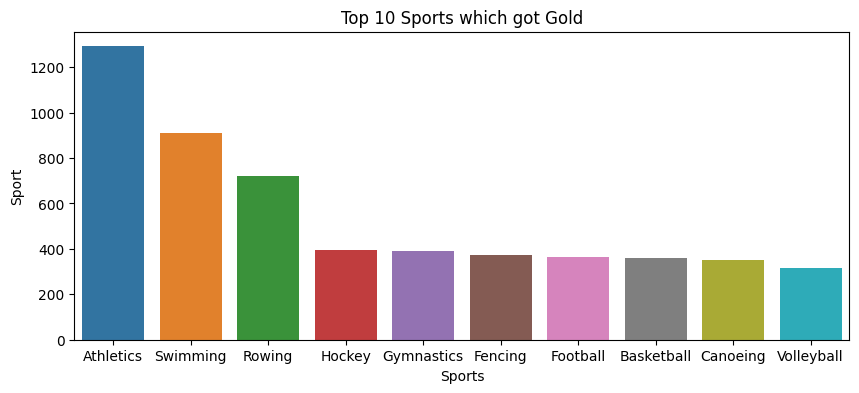

In [ ]:
gold = df[df['Medal'] == 'Gold'][['Sport']]
Gold = gold['Sport'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,4))
plt.title('Top 10 Sports which got Gold')
plt.xlabel('Sports')
plt.ylabel('Number of Gold')
sns.barplot(x = Gold.index, y = Gold)

# **Prediction using Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')
df = df.dropna()
df = df.drop_duplicates(keep = 'first')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [ ]:
df.duplicated().sum()

0

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Sport'], prefix = 'Sport')],axis=1)
df.drop('Sport', axis = 1)
df.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,...,0,0,0,0,0,0,0,0,0,0
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df,pd.get_dummies(df['City'], prefix = 'City')],axis=1)
df.drop('City', axis = 1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City_Sarajevo,City_Seoul,City_Sochi,City_Squaw Valley,City_St. Louis,City_Stockholm,City_Sydney,City_Tokyo,City_Torino,City_Vancouver
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,...,0,0,1,0,0,0,0,0,0,0
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Medal'], prefix = 'Medal')],axis=1)
df.drop('Medal', axis = 1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City_Squaw Valley,City_St. Louis,City_Stockholm,City_Sydney,City_Tokyo,City_Torino,City_Vancouver,Medal_Bronze,Medal_Gold,Medal_Silver
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,...,0,0,0,0,0,0,0,1,0,0
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,1,0,0
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,1,0
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,1,0
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.columns.tolist()

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal',
 'Sport_Alpine Skiing',
 'Sport_Archery',
 'Sport_Art Competitions',
 'Sport_Athletics',
 'Sport_Badminton',
 'Sport_Baseball',
 'Sport_Basketball',
 'Sport_Beach Volleyball',
 'Sport_Biathlon',
 'Sport_Bobsleigh',
 'Sport_Boxing',
 'Sport_Canoeing',
 'Sport_Cross Country Skiing',
 'Sport_Curling',
 'Sport_Cycling',
 'Sport_Diving',
 'Sport_Equestrianism',
 'Sport_Fencing',
 'Sport_Figure Skating',
 'Sport_Football',
 'Sport_Freestyle Skiing',
 'Sport_Golf',
 'Sport_Gymnastics',
 'Sport_Handball',
 'Sport_Hockey',
 'Sport_Ice Hockey',
 'Sport_Judo',
 'Sport_Lacrosse',
 'Sport_Luge',
 'Sport_Modern Pentathlon',
 'Sport_Nordic Combined',
 'Sport_Rhythmic Gymnastics',
 'Sport_Rowing',
 'Sport_Rugby',
 'Sport_Rugby Sevens',
 'Sport_Sailing',
 'Sport_Shooting',
 'Sport_Short Track Speed Skating',
 'Sport_Skeleton',
 'Sport_Ski Jumping',
 'Sport_Snowboar

In [ ]:
y = df[['Medal_Bronze', 'Medal_Gold', 'Medal_Silver']]
X = df[['Age', 'ID','Year','Sport_Alpine Skiing',
 'Sport_Archery',
 'Sport_Art Competitions',
 'Sport_Athletics',
 'Sport_Badminton',
 'Sport_Baseball',
 'Sport_Basketball',
 'Sport_Beach Volleyball',
 'Sport_Biathlon',
 'Sport_Bobsleigh',
 'Sport_Boxing',
 'Sport_Canoeing',
 'Sport_Cross Country Skiing',
 'Sport_Curling',
 'Sport_Cycling',
 'Sport_Diving',
 'Sport_Equestrianism',
 'Sport_Fencing',
 'Sport_Figure Skating',
 'Sport_Football',
 'Sport_Freestyle Skiing',
 'Sport_Golf',
 'Sport_Gymnastics',
 'Sport_Handball',
 'Sport_Hockey',
 'Sport_Ice Hockey',
 'Sport_Judo',
 'Sport_Lacrosse',
 'Sport_Luge',
 'Sport_Modern Pentathlon',
 'Sport_Nordic Combined',
 'Sport_Rhythmic Gymnastics',
 'Sport_Rowing',
 'Sport_Rugby',
 'Sport_Rugby Sevens',
 'Sport_Sailing',
 'Sport_Shooting',
 'Sport_Short Track Speed Skating',
 'Sport_Skeleton',
 'Sport_Ski Jumping',
 'Sport_Snowboarding',
 'Sport_Softball',
 'Sport_Speed Skating',
 'Sport_Swimming',
 'Sport_Synchronized Swimming',
 'Sport_Table Tennis',
 'Sport_Taekwondo',
 'Sport_Tennis',
 'Sport_Trampolining',
 'Sport_Triathlon',
 'Sport_Tug-Of-War',
 'Sport_Volleyball',
 'Sport_Water Polo',
 'Sport_Weightlifting',
 'Sport_Wrestling',
 'City_Albertville',
 'City_Amsterdam',
 'City_Antwerpen',
 'City_Athina',
 'City_Atlanta',
 'City_Barcelona',
 'City_Beijing',
 'City_Berlin',
 'City_Calgary',
 'City_Chamonix',
 "City_Cortina d'Ampezzo",
 'City_Garmisch-Partenkirchen',
 'City_Grenoble',
 'City_Helsinki',
 'City_Innsbruck',
 'City_Lake Placid',
 'City_Lillehammer',
 'City_London',
 'City_Los Angeles',
 'City_Melbourne',
 'City_Mexico City',
 'City_Montreal',
 'City_Moskva',
 'City_Munich',
 'City_Nagano',
 'City_Oslo',
 'City_Paris',
 'City_Rio de Janeiro',
 'City_Roma',
 'City_Salt Lake City',
 'City_Sankt Moritz',
 'City_Sapporo',
 'City_Sarajevo',
 'City_Seoul',
 'City_Sochi',
 'City_Squaw Valley',
 'City_St. Louis',
 'City_Stockholm',
 'City_Sydney',
 'City_Tokyo',
 'City_Torino',
 'City_Vancouver',
 'City_Albertville',
 'City_Amsterdam',
 'City_Antwerpen',
 'City_Athina',
 'City_Atlanta',
 'City_Barcelona',
 'City_Beijing',
 'City_Berlin',
 'City_Calgary',
 'City_Chamonix',
 "City_Cortina d'Ampezzo",
 'City_Garmisch-Partenkirchen',
 'City_Grenoble',
 'City_Helsinki',
 'City_Innsbruck',
 'City_Lake Placid',
 'City_Lillehammer',
 'City_London',
 'City_Los Angeles',
 'City_Melbourne',
 'City_Mexico City',
 'City_Montreal',
 'City_Moskva',
 'City_Munich',
 'City_Nagano',
 'City_Oslo',
 'City_Paris',
 'City_Rio de Janeiro',
 'City_Roma',
 'City_Salt Lake City',
 'City_Sankt Moritz',
 'City_Sapporo',
 'City_Sarajevo',
 'City_Seoul',
 'City_Sochi',
 'City_Squaw Valley',
 'City_St. Louis',
 'City_Stockholm',
 'City_Sydney',
 'City_Tokyo',
 'City_Torino',
 'City_Vancouver']]

In [ ]:
#Model creation
model = RandomForestRegressor(random_state=1)
#training the data
X_train, X_test, y_train, y_test = train_test_split(X, y)
#fitting
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)



[[0.14159524 0.34334921 0.51505556]
 [0.31       0.07       0.62      ]
 [0.28333333 0.39666667 0.32      ]
 ...
 [0.335      0.345      0.32      ]
 [0.32       0.405      0.275     ]
 [0.05       0.585      0.365     ]]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,predictions)

0.4298580909867695

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))